# Gantt chart about the end of the PhD

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 

## Without extension

In [13]:
phd_start = '2023-01-01'
phd_end = '2023-10-03'

df = pd.DataFrame(

    {
        "Task": pd.Series(['Publish article', 'Patch-based segmentation', 'Formalism of a STDP with weights and delays', 'Apply for motion compensation', 'Unsupervised clustering of raster plots', 'Thesis writing']),

        "start": pd.Series(["2023-01-01", "2023-01-01", "2023-01-01", "2023-03-01", "2023-05-01", "2023-07-01"]),

        "end": pd.Series(["2023-05-01", "2023-03-30", "2023-06-01", "2023-07-01", "2023-09-01",  "2023-10-01"]),

        "Project": pd.Series(['HOTS', 'WP3', 'LSD', 'LSD', 'LSD', 'global'])

    }

)
df.head()

,Task,start,end,Project
0,Publish article,2023-01-01,2023-05-01,HOTS
1,Patch-based segmentation,2023-01-01,2023-03-30,WP3
2,Formalism of a STDP with weights and delays,2023-01-01,2023-06-01,LSD
3,Apply for motion compensation,2023-03-01,2023-07-01,LSD
4,Unsupervised clustering of raster plots,2023-05-01,2023-09-01,LSD


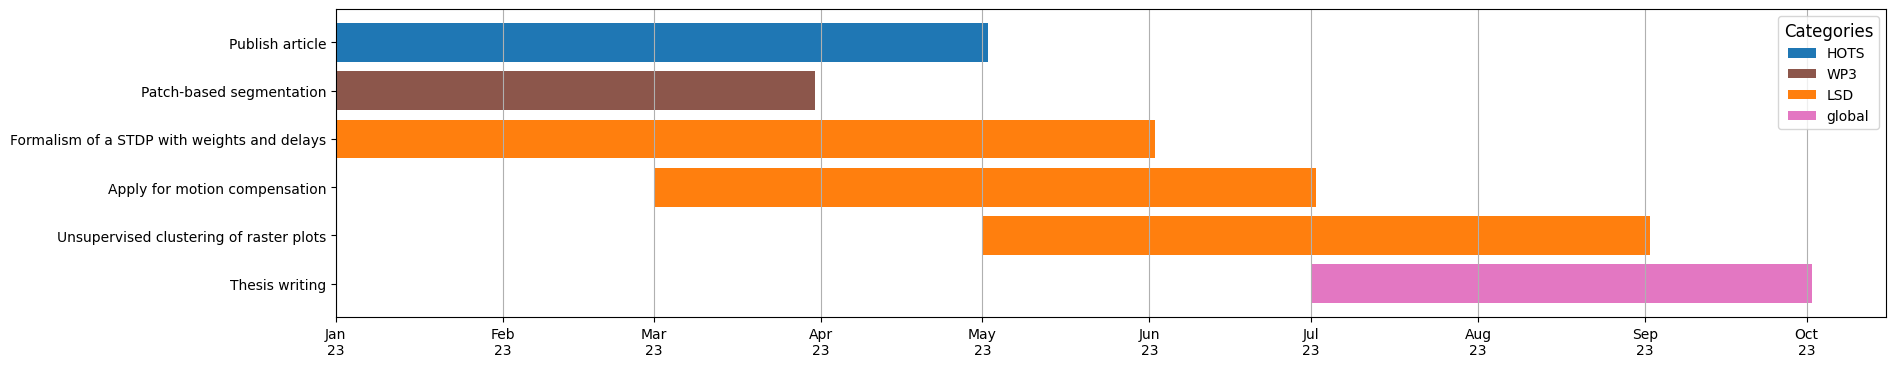

In [14]:
###### PRE-PROCESSING THE DATA ######
prop_cycle = plt.rcParams['axes.prop_cycle']
color = prop_cycle.by_key()['color']
c_dict={'HOTS':color[0], 'LSD':color[1], 'conference':color[3], 'workshop':color[2], 'dissemination':color[4], 'WP3':color[5], 'global':color[6]}
#Convert dates to datetime format
df.start=pd.to_datetime(df.start)
df.end=pd.to_datetime(df.end)#Add Duration
df['duration']=df.end-df.start
df.duration=df.duration.apply(lambda x: x.days+1)#sort in ascending order of start date
df=df.sort_values(by='start', ascending=True)#project level variables
p_start=df.start.min()
p_end=df.end.max()
p_duration=(p_end-p_start).days+1#Add relative date
df['rel_start']=df.start.apply(lambda x: (x-p_start).days)#Create custom x-ticks and x-tick labels
months_list = pd.date_range(start=phd_start, end=phd_end, freq='MS')
x_ticks = [(months_list[i]-p_start).days for i in range(months_list.size)]
x_labels = months_list.strftime('%b\n%y').to_list()######  PLOTTING GANTT CHART ######
plt.figure(figsize=(20,4))
plt.title('', size=18)
x_previous_conf = 0
x_previous_event = 0
diff_conf = 50
for i in range(df.shape[0]):
    x=df.rel_start[i]
    if df.Project[i]=='conference':
        if diff_conf<50:
            previous_too = True
        else: previous_too = False
        diff_conf = x-x_previous_conf
        y=8
        plt.scatter(x, y, color=c_dict[df.Project[i]], label = df.Project[i])
        if diff_conf<50:
            if previous_too:
                plt.text(x+5, y-.2, df.Task[i], fontsize=9)
            else:
                plt.text(x+5, y+.3, df.Task[i], fontsize=9)
        else:
            plt.text(x-20, y-.2, df.Task[i], fontsize=9)
        x_previous_conf = x.copy()
    elif df.Project[i]=='workshop' or df.Project[i]=='dissemination':
        diff_event = x-x_previous_event
        y=9
        plt.scatter(x, y, color=c_dict[df.Project[i]], label = df.Project[i])
        if diff_event<60:
            plt.text(x+5, y+.3, df.Task[i], fontsize=9)
        else:
            plt.text(x+5, y-.2, df.Task[i], fontsize=9)
        x_previous_event = x.copy()
    else:
        plt.barh(y=df.Task[i], left=x, width=df.duration[i], color=c_dict[df.Project[i]], label = df.Project[i])
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid(axis='x')
#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, fontsize='medium', 
           title='Categories', title_fontsize='large')
plt.show()

## With extension

In [16]:
phd_start = '2023-01-01'
phd_end = '2024-05-01'

df = pd.DataFrame(

    {
        "Task": pd.Series(['Publish article', 'Patch-based segmentation', 
                           'Formalism of a STDP with weights and delays', 'Develop an event-based spiking neuron', 'Unsupervised clustering of raster plots', 'Orientation/direction extraction for events', 'Thesis writing']),

        "start": pd.Series(["2023-01-01", "2023-01-01", "2023-01-01", "2023-03-01", "2023-06-01", "2023-10-01", "2023-12-01"]),

        "end": pd.Series(["2023-05-01", "2023-03-30", "2023-06-01", "2023-09-01", "2023-12-01", "2024-02-01", "2024-04-01"]),

        "Project": pd.Series(['HOTS', 'WP3', 'LSD', 'LSD', 'LSD', 'LSD', 'global'])

    }

)
df.head()

,Task,start,end,Project
0,Publish article,2023-01-01,2023-05-01,HOTS
1,Patch-based segmentation,2023-01-01,2023-03-30,WP3
2,Formalism of a STDP with weights and delays,2023-01-01,2023-06-01,LSD
3,Develop an event-based spiking neuron,2023-03-01,2023-09-01,LSD
4,Unsupervised clustering of raster plots,2023-06-01,2023-12-01,LSD


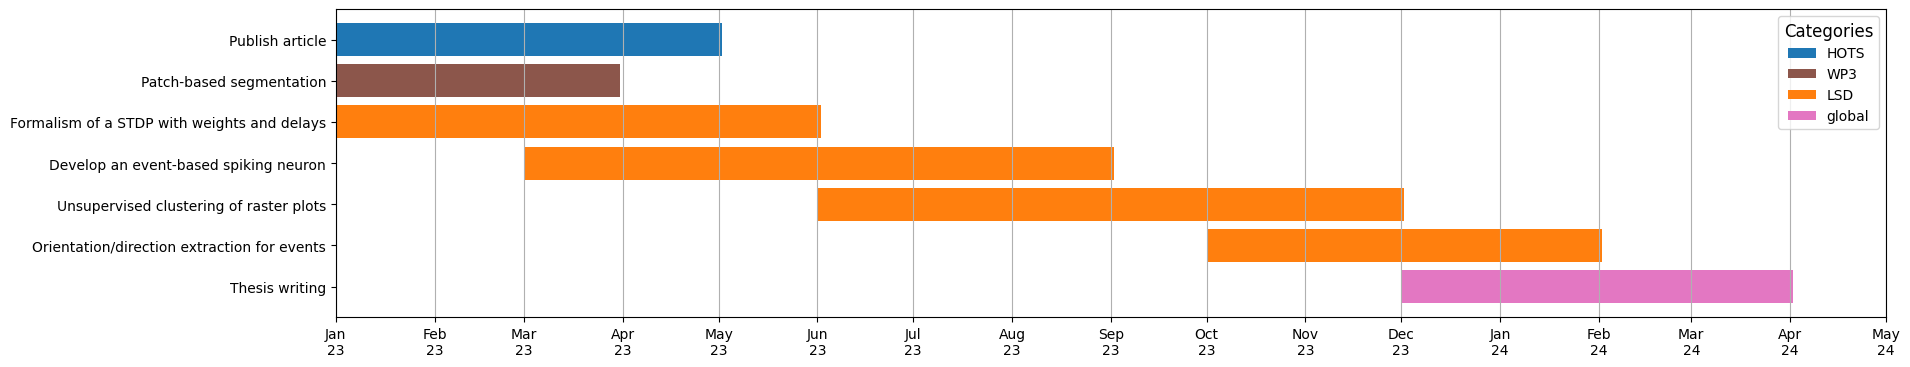

In [17]:
###### PRE-PROCESSING THE DATA ######
prop_cycle = plt.rcParams['axes.prop_cycle']
color = prop_cycle.by_key()['color']
c_dict={'HOTS':color[0], 'LSD':color[1], 'conference':color[3], 'workshop':color[2], 'dissemination':color[4], 'WP3':color[5], 'global':color[6]}
#Convert dates to datetime format
df.start=pd.to_datetime(df.start)
df.end=pd.to_datetime(df.end)#Add Duration
df['duration']=df.end-df.start
df.duration=df.duration.apply(lambda x: x.days+1)#sort in ascending order of start date
df=df.sort_values(by='start', ascending=True)#project level variables
p_start=df.start.min()
p_end=df.end.max()
p_duration=(p_end-p_start).days+1#Add relative date
df['rel_start']=df.start.apply(lambda x: (x-p_start).days)#Create custom x-ticks and x-tick labels
months_list = pd.date_range(start=phd_start, end=phd_end, freq='MS')
x_ticks = [(months_list[i]-p_start).days for i in range(months_list.size)]
x_labels = months_list.strftime('%b\n%y').to_list()######  PLOTTING GANTT CHART ######
plt.figure(figsize=(20,4))
plt.title('', size=18)
x_previous_conf = 0
x_previous_event = 0
diff_conf = 50
for i in range(df.shape[0]):
    x=df.rel_start[i]
    if df.Project[i]=='conference':
        if diff_conf<50:
            previous_too = True
        else: previous_too = False
        diff_conf = x-x_previous_conf
        y=8
        plt.scatter(x, y, color=c_dict[df.Project[i]], label = df.Project[i])
        if diff_conf<50:
            if previous_too:
                plt.text(x+5, y-.2, df.Task[i], fontsize=9)
            else:
                plt.text(x+5, y+.3, df.Task[i], fontsize=9)
        else:
            plt.text(x-20, y-.2, df.Task[i], fontsize=9)
        x_previous_conf = x.copy()
    elif df.Project[i]=='workshop' or df.Project[i]=='dissemination':
        diff_event = x-x_previous_event
        y=9
        plt.scatter(x, y, color=c_dict[df.Project[i]], label = df.Project[i])
        if diff_event<60:
            plt.text(x+5, y+.3, df.Task[i], fontsize=9)
        else:
            plt.text(x+5, y-.2, df.Task[i], fontsize=9)
        x_previous_event = x.copy()
    else:
        plt.barh(y=df.Task[i], left=x, width=df.duration[i], color=c_dict[df.Project[i]], label = df.Project[i])
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid(axis='x')
#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, fontsize='medium', 
           title='Categories', title_fontsize='large')
plt.show()